这个实验拟合的函数为$$y = x_1^2 + 2*x_2^2 + 3*x_3$$  
所有setting与non-linear hard相似，但是这里的结果L0更有效，可以参照下面的结果。在样本量足够多的时候，采用relu和adam本身可以达到很小的loss，不会导致严重的过拟合。L1作用不明显，收敛慢。L0比L1收敛快，效果好，可以得到稀疏解。

In [2]:
cd ~/keras

/home/zhengfeng/keras


In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [4]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import regularizers
import matplotlib.pylab as plt

Couldn't import dot_parser, loading of dot files will not be possible.


Using TensorFlow backend.


In [5]:
#[(200,500,300),(50,12,500),(50,500,500),(50,1000,1000),(100,12,500),(100,500,1000),(100,1000,1000)]
#10000,100,500 
n = 10000
p = 100
problem = 'NLeasy'

In [6]:
X = np.load("/home/zhengfeng/simulationData/"+problem+"_X_"+str(n)+"_"+str(p)+".npy")
y = np.load("/home/zhengfeng/simulationData/"+problem+"_Y_"+str(n)+"_"+str(p)+".npy")
ValidationX = np.load("/home/zhengfeng/simulationData/"+problem+"_VX_"+str(n)+"_"+str(p)+".npy")
Validationy = np.load("/home/zhengfeng/simulationData/"+problem+"_VY_"+str(n)+"_"+str(p)+".npy")

In [7]:
model = Sequential()
layer1 = Dense(256, activation="relu", init="normal", input_dim=p)
layer2 = Dense(1, activation="linear", init="normal", input_dim=256)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer4 = Dense(1, activation="linear", init="normal", input_dim=16)
model.add(layer1)
model.add(layer2)
# model.add(layer3)
# model.add(layer4)
# model.add(Dense(16, input_dim=32,init='normal',activation='sigmoid'))
# model.add(Dense(1, init='normal',activation='linear'))

model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())
# model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModifiedOnLayer(layers=[0],tau=0.1, alpha=0.2,lr =0.01))



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="normal", activation="relu", input_dim=100)`
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=256)`
  app.launch_new_instance()


In [8]:
#pre-train
model.fit(X, y, validation_data=(ValidationX,Validationy),batch_size=10, nb_epoch=50)
model.save_weights("/home/zhengfeng/exp/weights.h5")
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WPretrain.txt',w[0].T)

keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 10000 samples, validate on 500 samples
Epoch 1/50
10000/10000 [==============================] - 1s - loss: 8.9243 - val_loss: 2.4753
Epoch 2/50
10000/10000 [==============================] - 0s - loss: 2.0273 - val_loss: 1.4789
Epoch 3/50
10000/10000 [==============================] - 0s - loss: 1.2788 - val_loss: 0.9710
Epoch 4/50
10000/10000 [==============================] - 1s - loss: 0.7687 - val_loss: 0.7148
Epoch 5/50
10000/10000 [==============================] - 0s - loss: 0.6090 - val_loss: 0.6248
Epoch 6/50
10000/10000 [==============================] - 0s - loss: 0.5173 - val_loss: 0.6134
Epoch 7/50
10000/10000 [==============================] - 0s - loss: 0.4556 - val_loss: 0.5847
Epoch 8/50
10000/10000 [==============================] - 0s - loss: 0.4144 - val_loss: 0.5097
Epoch 9/50
10000/10000 [==============================] - 1s - loss: 0.3368 - val_loss: 0.5211
Epoch 10/50
10000/10000 [==============================] - 0s - loss: 0.3072 - val_loss: 0.4543
E

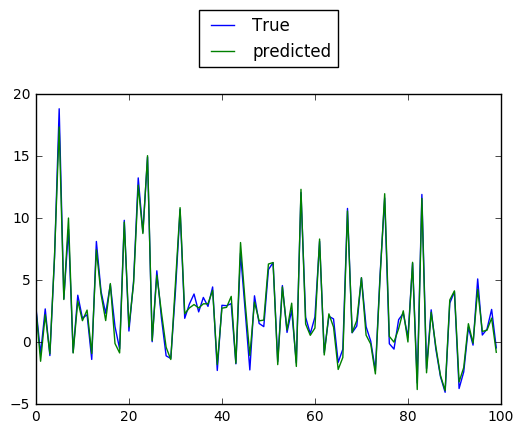

In [9]:
predictY = model.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [10]:
w_count = np.full_like(w[0].T[0],0)
w_sum = np.full_like(w[0].T[0],0.0)
for i in range(w[0].T.shape[0]):
    w_sum += abs(w[0].T[i])
    w_count += (abs(w[0].T[i])>0)*1

In [11]:
w[0].T[0]

array([  1.46535110e+00,   1.66000724e-01,   2.19262168e-02,
        -6.76561892e-02,  -1.08282812e-01,  -2.73668319e-02,
         3.90166119e-02,  -7.18255714e-02,  -1.43928733e-02,
         8.34138244e-02,   9.18048844e-02,  -3.90229411e-02,
         4.11914624e-02,   7.37516582e-02,  -1.27894208e-01,
         8.74372050e-02,  -1.02844432e-01,   9.83999819e-02,
         3.47314514e-02,   3.15619260e-02,  -4.92498744e-03,
        -1.01845764e-01,  -7.85279050e-02,  -2.22877283e-02,
        -2.15205108e-03,  -2.27813274e-02,   1.32289110e-02,
        -1.15077436e-01,  -7.19969869e-02,  -1.94715131e-02,
         2.78971978e-02,  -9.12424773e-02,  -1.54418275e-02,
        -7.07468688e-02,   4.65310812e-02,  -8.12366679e-02,
        -3.56809981e-02,  -8.05395283e-03,  -8.08531046e-03,
         9.53647867e-02,  -9.11212899e-03,   5.62935062e-02,
         6.76812530e-02,  -4.38035652e-02,  -6.22520559e-02,
        -4.52680103e-02,  -5.34889707e-03,  -2.28875261e-02,
         1.28690479e-02,

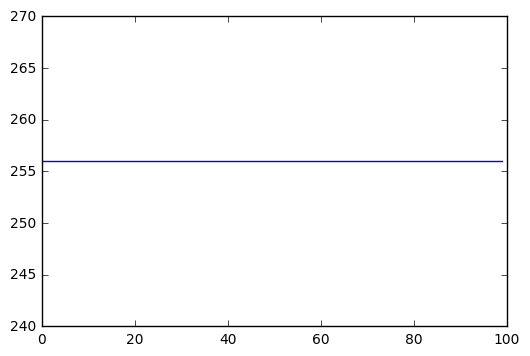

In [15]:
plt.plot(w_count[:100])
plt.show()

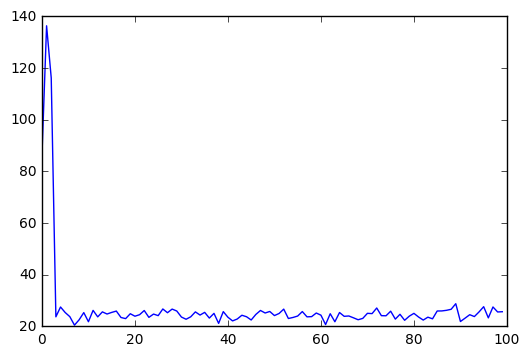

In [16]:
plt.plot(w_sum)
plt.show()

In [17]:
#L1 

loaded_model_l1 = Sequential()
layer1 = Dense(256, activation="relu", init="normal", input_dim=p, W_regularizer=regularizers.l1(1))
# layer1 = Dense(16, activation="relu", init="normal", input_dim=p, kernel_regularizer=regularizers.l1(0.05))#activity_regularizer=regularizers.l1(0.1)
layer2 = Dense(1, activation="linear", init="normal", input_dim=256)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)

loaded_model_l1.add(layer1)
loaded_model_l1.add(layer2)
# loaded_model_l1.add(layer3)

loaded_model_l1.load_weights("/home/zhengfeng/exp/weights.h5")
loaded_model_l1.compile(loss='mean_squared_error', optimizer=optimizers.Adam())
loaded_model_l1.fit(X, y, validation_data=(ValidationX,Validationy), batch_size=15, nb_epoch=100)
score2 = loaded_model_l1.evaluate(ValidationX, Validationy, batch_size=128)
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WL1.txt',w[0].T)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg..., input_dim=100)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=256)`


Train on 10000 samples, validate on 500 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: 471.3398 - val_loss: 67.0598
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 34.3024 - val_loss: 19.7158
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 17.4639 - val_loss: 15.4172
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 14.9721 - val_loss: 13.4851
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 13.5057 - val_loss: 12.4108
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 12.5505 - val_loss: 11.4262
Epoch 7/100
10000/10000 [==============================] - 0s - loss: 11.8180 - val_loss: 11.1063
Epoch 8/100
10000/10000 [==============================] - 0s - loss: 11.2470 - val_loss: 12.3969
Epoch 9/100
10000/10000 [==============================] - 0s - loss: 10.8594 - val_loss: 10.2023
Epoch 10/100
10000/10000 [==============================] - 0s - loss

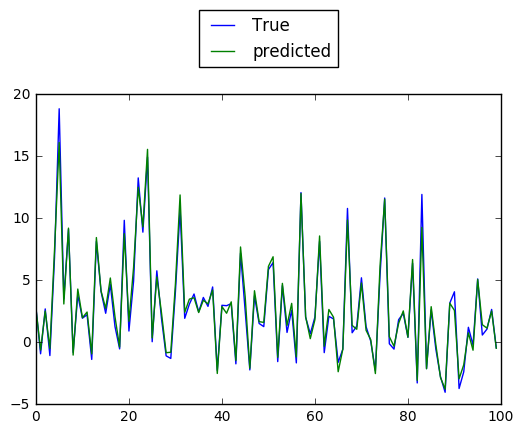

In [18]:
predictY = loaded_model_l1.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [19]:
weight_L1 = np.loadtxt('/home/zhengfeng/exp/WL1.txt')
w_count = np.full_like(weight_L1[0],0)
w_sum = np.full_like(weight_L1[0],0.0)
for i in range(weight_L1.shape[0]):
    w_sum += abs(weight_L1[i])
    w_count += (abs(weight_L1[i])>0)*1

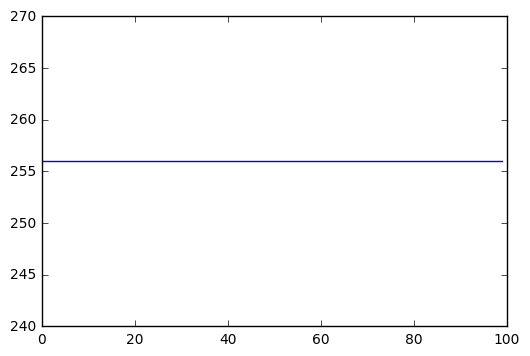

In [20]:
plt.plot(w_count)
plt.show()

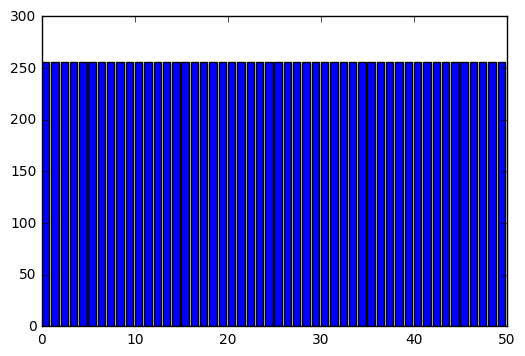

In [21]:
plt.bar(range(50),w_count[:50])
plt.show()

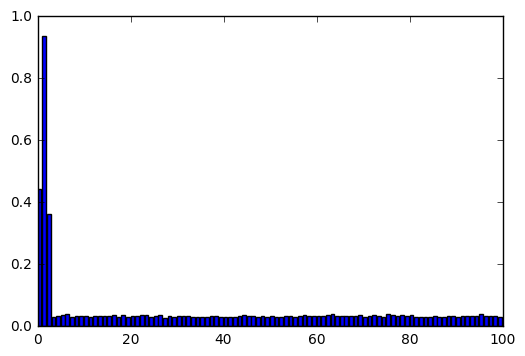

In [22]:
plt.bar(range(100),w_sum[:100])
plt.show()

In [23]:
#l0training

loaded_model = Sequential()
# layer1 = Dense(16, activation="relu", init="normal", input_dim=p, W_regularizer=regularizers.l1(0.5))
layer1 = Dense(256, activation="relu", init="normal", input_dim=p)
layer2 = Dense(1, activation="linear", init="normal", input_dim=256)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer4 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)

loaded_model.add(layer1)
loaded_model.add(layer2)
# loaded_model.add(layer3)
# loaded_model.add(layer4)
loaded_model.load_weights("/home/zhengfeng/exp/weights.h5")
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.AdamModified(tau=0.2, alpha=0.2, lr = 0.1))
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModified(tau=0.2, alpha=0.1,lr =0.05))
loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModifiedOnLayer(layers=[0],tau=0.1, alpha=1,lr =0.005))
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())
loaded_model.fit(X, y, validation_data=(ValidationX,Validationy), batch_size=100, nb_epoch=200)
score2 = loaded_model.evaluate(ValidationX, Validationy, batch_size=128)
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WL0.txt',w[0].T)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="normal", activation="relu", input_dim=100)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=256)`


Train on 10000 samples, validate on 500 samples
Epoch 1/200
10000/10000 [==============================] - 0s - loss: 0.7442 - val_loss: 1.3656
Epoch 2/200
10000/10000 [==============================] - 0s - loss: 1.4804 - val_loss: 1.5822
Epoch 3/200
10000/10000 [==============================] - 0s - loss: 1.4367 - val_loss: 1.4481
Epoch 4/200
10000/10000 [==============================] - 0s - loss: 1.2915 - val_loss: 1.3280
Epoch 5/200
10000/10000 [==============================] - 0s - loss: 1.1755 - val_loss: 1.2035
Epoch 6/200
10000/10000 [==============================] - 0s - loss: 1.0594 - val_loss: 1.1103
Epoch 7/200
10000/10000 [==============================] - 0s - loss: 0.8856 - val_loss: 0.9076
Epoch 8/200
10000/10000 [==============================] - 0s - loss: 0.7366 - val_loss: 0.8144
Epoch 9/200
10000/10000 [==============================] - 0s - loss: 0.7042 - val_loss: 0.7532
Epoch 10/200
10000/10000 [==============================] - 0s - loss: 0.6111 - val_loss

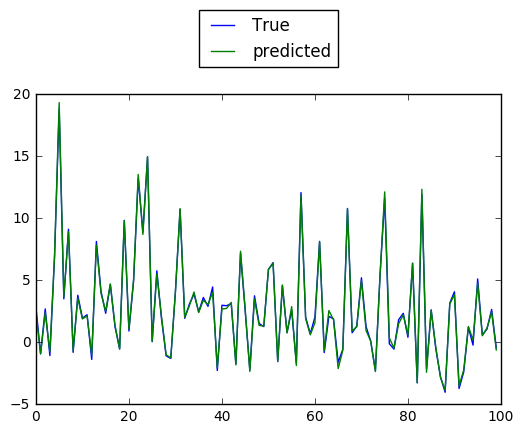

In [24]:
predictY = loaded_model.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [25]:
weight_L0 = np.loadtxt('/home/zhengfeng/exp/WL0.txt')

In [26]:
w_count = np.full_like(weight_L0[0],0)
w_sum = np.full_like(weight_L0[0],0.0)
for i in range(weight_L0.shape[0]):
    w_sum += abs(weight_L0[i])
    w_count += (abs(weight_L0[i])>0)*1

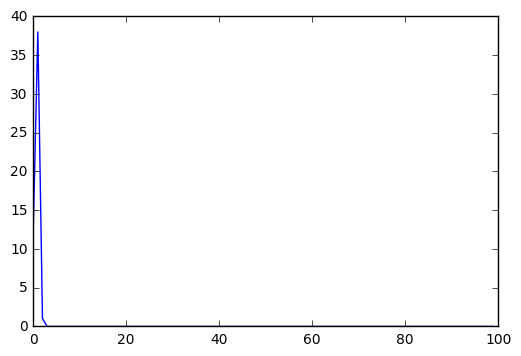

In [27]:
plt.plot(w_count)
plt.show()

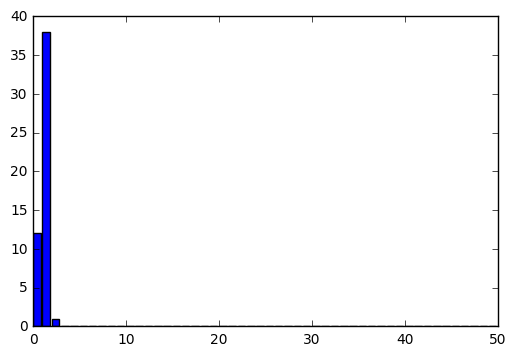

In [28]:
plt.bar(range(50),w_count[:50])
plt.show()

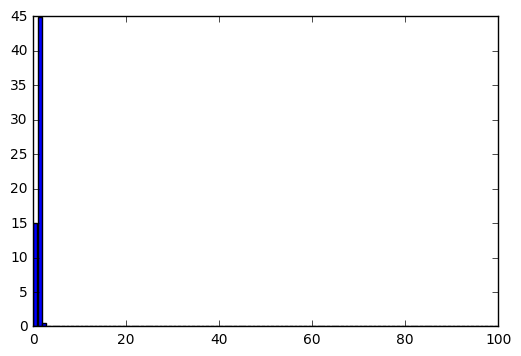

In [29]:
plt.bar(range(100),w_sum[:100])
plt.show()